In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

from qiskit import Aer, QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.opflow import Z, I
from qiskit.utils import  algorithm_globals
from qiskit.algorithms.optimizers import SPSA

from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier

from IPython.display import clear_output

from sklearn.model_selection import train_test_split

algorithm_globals.random_seed = 42
hamiltonian = Z ^ I ^ I


from Aux_Data import plot_predicted, plot_area, plot_bloch_sphere
from QWNN import angle_encoding_2qubits, neuron
from Aux_QuantumML import get_opflow_qnn


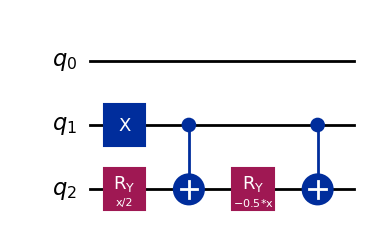

In [2]:
qc = QuantumCircuit(3)
param_x1 = Parameter("x")
qc.x(1)
qc.mcry(param_x1, [1], 2)
qc.draw('mpl', style='iqx')

In [3]:
qnn4 = SamplerQNN(circuit=qc, input_params=[], weight_params=[param_x1])
qnn4.forward(input_data=[], weights=[np.pi])

array([[0.00000000e+00, 0.00000000e+00, 1.82023532e-33, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

No exemplo anterior podemos ver que os seletores estão funcionando como achamos. Agora, vamos testar o circuito encoder

### Cicuito Encoder

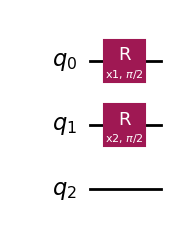

In [4]:
test = QuantumCircuit(3)
feature_map = angle_encoding_2qubits()
test.append(feature_map, [0,1])
#ansatz= neuron("p1", "p2", "p3", "p4")
#test.append(ansatz, [0,1,2])
test.decompose().decompose().draw('mpl', style='iqx')

In [8]:
qnn_enc = SamplerQNN(circuit=test, input_params=feature_map.parameters, weight_params=[])

Para 011

In [9]:
qnn_enc.forward(input_data=[np.pi,np.pi], weights=[])

array([[1.40579963e-65, 3.74939946e-33, 3.74939946e-33, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Para 000

In [10]:
qnn_enc.forward(input_data=[0,0], weights=[])

array([[1., 0., 0., 0., 0., 0., 0., 0.]])

Para 001

In [11]:
qnn_enc.forward(input_data=[np.pi,0], weights=[])

array([[3.74939946e-33, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Para 010

In [12]:
qnn_enc.forward(input_data=[0,np.pi], weights=[])

array([[3.74939946e-33, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

### Testando o ansatz

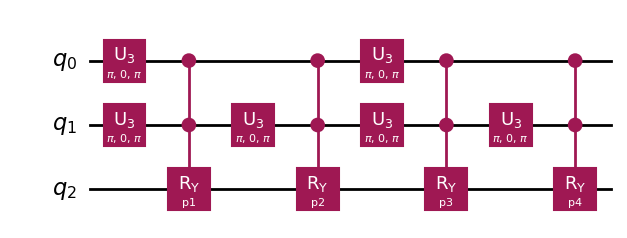

In [15]:
test_ansatz = QuantumCircuit(3)
ansatz= neuron("p1", "p2", "p3", "p4")
test_ansatz.append(ansatz, [0,1,2])
test_ansatz.decompose().decompose().draw('mpl', style='iqx')

In [18]:
qnn_ansatz = SamplerQNN(circuit=test_ansatz, input_params=[], weight_params=ansatz.parameters)

In [19]:
qnn_ansatz.forward([], weights=[np.pi/2, 0,0,0])

array([[0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. ]])

0,5 |000> + 0,5 |100>

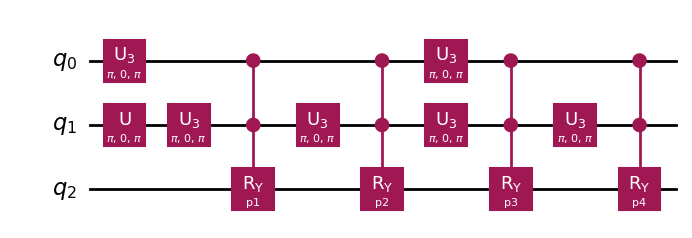

In [20]:
test_ansatz = QuantumCircuit(3)
test_ansatz.x(1)
ansatz= neuron("p1", "p2", "p3", "p4")
test_ansatz.append(ansatz, [0,1,2])
test_ansatz.decompose().decompose().draw('mpl', style='iqx')


In [21]:
qnn_ansatz = SamplerQNN(circuit=test_ansatz, input_params=[], weight_params=ansatz.parameters)
qnn_ansatz.forward([], weights=[0, np.pi/2,0,0])

array([[0. , 0. , 0.5, 0. , 0. , 0. , 0.5, 0. ]])

0,5 |010> + 0,5 |110>

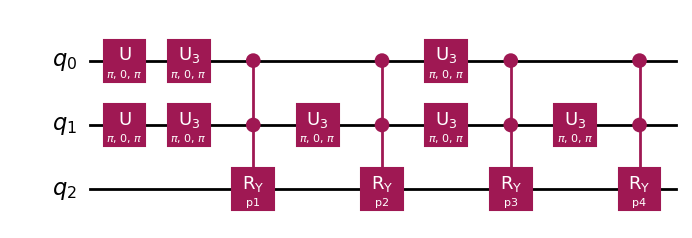

In [22]:
test_ansatz = QuantumCircuit(3)
test_ansatz.x(0)
test_ansatz.x(1)
ansatz= neuron("p1", "p2", "p3", "p4")
test_ansatz.append(ansatz, [0,1,2])
test_ansatz.decompose().decompose().draw('mpl', style='iqx')

In [23]:
qnn_ansatz = SamplerQNN(circuit=test_ansatz, input_params=[], weight_params=ansatz.parameters)
qnn_ansatz.forward([], weights=[0, 0,0,np.pi])

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.82023532e-33,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

100

### Vamos tentar agora juntar os dois e entender o que rola

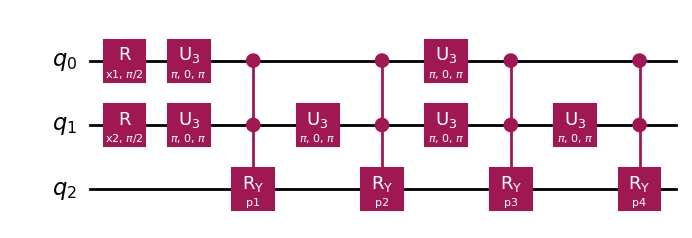

In [25]:
qc = QuantumCircuit(3)
feature_map = angle_encoding_2qubits()
qc.append(feature_map, [0,1])
ansatz= neuron("p1", "p2", "p3", "p4")
qc.append(ansatz, [0,1,2])
qc.decompose().decompose().draw('mpl', style='iqx')

In [40]:
qnn = SamplerQNN(circuit=qc, input_params=feature_map.parameters, weight_params=ansatz.parameters)
qnn.forward([np.pi, 0], weights=[0, np.pi,0,0])

array([[5.6523174e-33, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

100, mas deveria dar 101

In [36]:
qnn.forward([np.pi,0], weights=[0, 0,0,0])

array([[1.82023532e-33, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Deveria dar diferente do primeiro

In [45]:
qnn.forward([np.pi,np.pi], weights=[0, 0,0,np.pi/2])

array([[5.28699741e-34, 0.00000000e+00, 5.28699741e-34, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 5.00000000e-01, 0.00000000e+00]])

Deveria ser |011>+|111>, e não |100>+|110>

In [42]:
qnn.weight_params

[Parameter(p1), Parameter(p2), Parameter(p3), Parameter(p4)]